**Imports**

In [13]:
import time
import numpy as np
import optuna
import optuna.visualization as vis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Load data**

In [14]:
def load_data():
    digits = load_digits()
    X_train, X_test, y_train, y_test = train_test_split(
        digits.data, digits.target, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()


**OPTIMIZATIONS**

**Grid Search**

In [15]:
def grid_search(trial):
    n_estimators = trial.suggest_categorical("n_estimators", [50, 100, 200])
    max_depth = trial.suggest_categorical("max_depth", [None, 10, 20])
    min_samples_split = trial.suggest_categorical("min_samples_split", [2, 5, 10])
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Random Search**

In [16]:
def random_search(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200, step=50)
    max_depth = trial.suggest_categorical("max_depth", [None, 10, 20])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10, step=3)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Bayesian Search**

In [17]:
def bayesian_search(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200, step=50)
    max_depth = trial.suggest_categorical("max_depth", [None, 10, 20])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10, step=3)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42
    )
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Base model**

In [18]:
def baseline_model():
    clf = RandomForestClassifier(random_state=42)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1))

**Run the optimizations**

In [19]:
def run_optimization():
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = load_data()
    
    studies = {}
    execution_times = {}
    
    print("Running Baseline Model...")
    start_time = time.time()
    baseline_accuracy = baseline_model()
    end_time = time.time()
    baseline_time = end_time - start_time
    print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}, Time: {baseline_time:.2f}s")
    
    execution_times["Baseline"] = baseline_time
    
    for name, objective in zip(["Grid search", "Random search", "Bayesian search"], 
                               [grid_search, random_search, bayesian_search]):
        print(f"Running {name} Optimization...")
        study = optuna.create_study(direction="maximize")
        start_time = time.time()
        study.optimize(objective, n_trials=50)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Best Parameters ({name}): {study.best_params}, Time: {execution_time:.2f}s")
        studies[name] = study
        execution_times[name] = execution_time
    
    return studies, execution_times


**List of Searches for the plotting**

In [20]:
execution_times = {}

# Run the optimization and get the studies and execution times and set the seed to ensure reproducibility
studies = {
    "grid": optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)),
    "random": optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)),
    "bayesian": optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42)),
}

for name, study in studies.items():
    study.study_name = name

[I 2025-03-28 22:23:42,322] A new study created in memory with name: no-name-2c31641c-aaeb-42df-bf3d-11757665d1c5
[I 2025-03-28 22:23:42,323] A new study created in memory with name: no-name-2193df20-9b9e-41db-bb00-a3c990b8e783
[I 2025-03-28 22:23:42,324] A new study created in memory with name: no-name-a8145b1b-6e89-470c-97a5-5e1910460156


**Plotting**

In [ ]:
def plot_results(studies):
    optuna_studies = {name: study for name, study in studies.items() if name != "Baseline"}

    for name, study in optuna_studies.items():
        study.study_name = name  

    vis.plot_optimization_history(list(optuna_studies.values())).show();

    best_scores = {name: study.best_value for name, study in optuna_studies.items()}

    print("Best Accuracy Scores:")
    for name, score in best_scores.items():
        print(f"{name}: {score:.4f}")
        
studies, execution_times = run_optimization();

[I 2025-03-28 22:23:42,498] A new study created in memory with name: no-name-22d8d48c-aa12-4084-8631-02f84b193f56


Running Baseline Model...
Baseline Model Accuracy: 0.9701, Time: 0.16s
Running Grid search Optimization...


[I 2025-03-28 22:23:42,583] Trial 0 finished with value: 0.9631176061238692 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: 0.9631176061238692.
[I 2025-03-28 22:23:42,669] Trial 1 finished with value: 0.9631176061238692 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: 0.9631176061238692.
[I 2025-03-28 22:23:42,961] Trial 2 finished with value: 0.9624217118997912 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 0 with value: 0.9631176061238692.
[I 2025-03-28 22:23:43,108] Trial 3 finished with value: 0.9561586638830897 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 0 with value: 0.9631176061238692.
[I 2025-03-28 22:23:43,410] Trial 4 finished with value: 0.964509394572025 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5}. Best is trial 4 with value: 0

Best Parameters (Grid search): {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}, Time: 12.36s
Running Random search Optimization...


[I 2025-03-28 22:23:55,182] Trial 1 finished with value: 0.9665970772442588 and parameters: {'n_estimators': 150, 'max_depth': None, 'min_samples_split': 2}. Best is trial 1 with value: 0.9665970772442588.
c:\Users\shefs\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].

[I 2025-03-28 22:23:55,478] Trial 2 finished with value: 0.964509394572025 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 1 with value: 0.9665970772442588.
c:\Users\shefs\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].

[I 2025-03-28 22:23:55,700] Trial 3 finished with value: 0.9624217118997912 and parameters: {'n_estimator

Best Parameters (Random search): {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}, Time: 8.70s
Running Bayesian search Optimization...


[I 2025-03-28 22:24:03,933] Trial 1 finished with value: 0.9617258176757133 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 0 with value: 0.965205288796103.
c:\Users\shefs\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].

[I 2025-03-28 22:24:04,184] Trial 2 finished with value: 0.9631176061238692 and parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5}. Best is trial 0 with value: 0.965205288796103.
c:\Users\shefs\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:699: UserWarning:

The distribution is specified by [2, 10] and step=3, but the range is not divisible by `step`. It will be replaced by [2, 8].

[I 2025-03-28 22:24:04,271] Trial 3 finished with value: 0.9617258176757133 and parameters: {'n_estimators':

Best Parameters (Bayesian search): {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}, Time: 8.87s


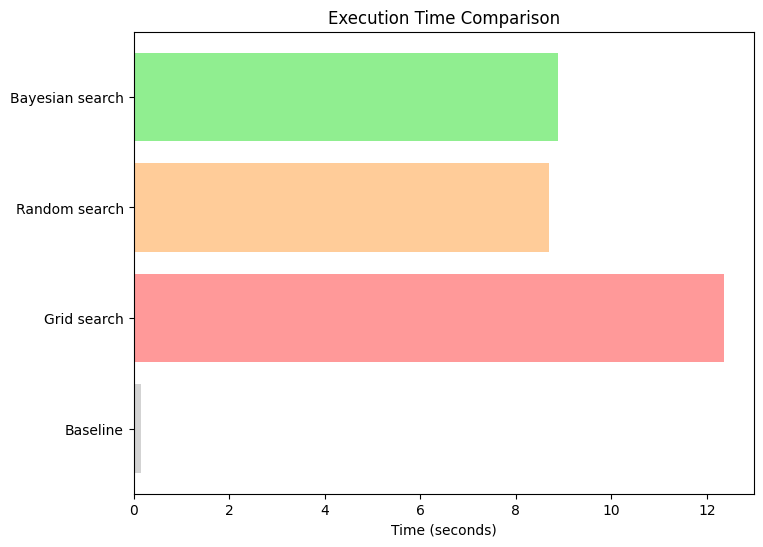

In [22]:
methods = list(execution_times.keys())
times = list(execution_times.values())

colors = ['lightgrey', '#FF9999', '#FFCC99', 'lightgreen']
plt.figure(figsize=(8, 6))
plt.barh(methods, times, color=colors)
plt.xlabel("Time (seconds)")
plt.title("Execution Time Comparison")
plt.show()

In [23]:
plot_results(studies);        

Best Accuracy Scores:
Grid search: 0.9729
Random search: 0.9708
Bayesian search: 0.9701


In [24]:
def plot_params(studies):
    for name, study in studies.items():
        if name == "Baseline":
            print(f"Baseline Model Accuracy: {study:.4f}")
        else:
            fig = vis.plot_param_importances(study)  # Get the Plotly figure
            fig.update_layout(title_text=f"{name}")
            fig.show()  # Display the figure

plot_params(studies)